In [1]:
# 붓꽃의 품종을 머신러닝을 이용하여 꽃잎과 꽃받침의 크기를 기반으로 분류
import pandas as pd
# csv 파일을 로딩
df = pd.read_csv("c:/data/iris/iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [2]:
# 품종을 기준으로 한 평균값들
df.groupby("Name").mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Name,,,,,
setosa,5.006,3.418,1.464,0.244,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


In [3]:
df["Name"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Name, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: setosa, 1: versicolor, 2: virginica )')

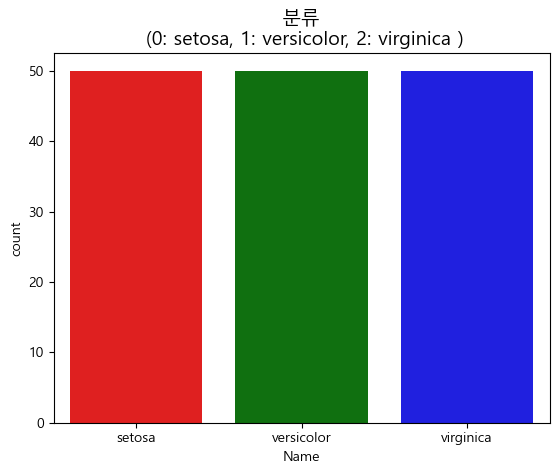

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
colors = ["red", "green", "blue"]
sns.countplot('Name', data=df, palette=colors)
plt.title('분류\n (0: setosa, 1: versicolor, 2: virginica )',fontsize=14)

In [5]:
cols=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df[cols]
y = df['Species']

array([[<AxesSubplot:xlabel='SepalLength', ylabel='SepalLength'>,
        <AxesSubplot:xlabel='SepalWidth', ylabel='SepalLength'>,
        <AxesSubplot:xlabel='PetalLength', ylabel='SepalLength'>,
        <AxesSubplot:xlabel='PetalWidth', ylabel='SepalLength'>],
       [<AxesSubplot:xlabel='SepalLength', ylabel='SepalWidth'>,
        <AxesSubplot:xlabel='SepalWidth', ylabel='SepalWidth'>,
        <AxesSubplot:xlabel='PetalLength', ylabel='SepalWidth'>,
        <AxesSubplot:xlabel='PetalWidth', ylabel='SepalWidth'>],
       [<AxesSubplot:xlabel='SepalLength', ylabel='PetalLength'>,
        <AxesSubplot:xlabel='SepalWidth', ylabel='PetalLength'>,
        <AxesSubplot:xlabel='PetalLength', ylabel='PetalLength'>,
        <AxesSubplot:xlabel='PetalWidth', ylabel='PetalLength'>],
       [<AxesSubplot:xlabel='SepalLength', ylabel='PetalWidth'>,
        <AxesSubplot:xlabel='SepalWidth', ylabel='PetalWidth'>,
        <AxesSubplot:xlabel='PetalLength', ylabel='PetalWidth'>,
        <AxesSubplot:

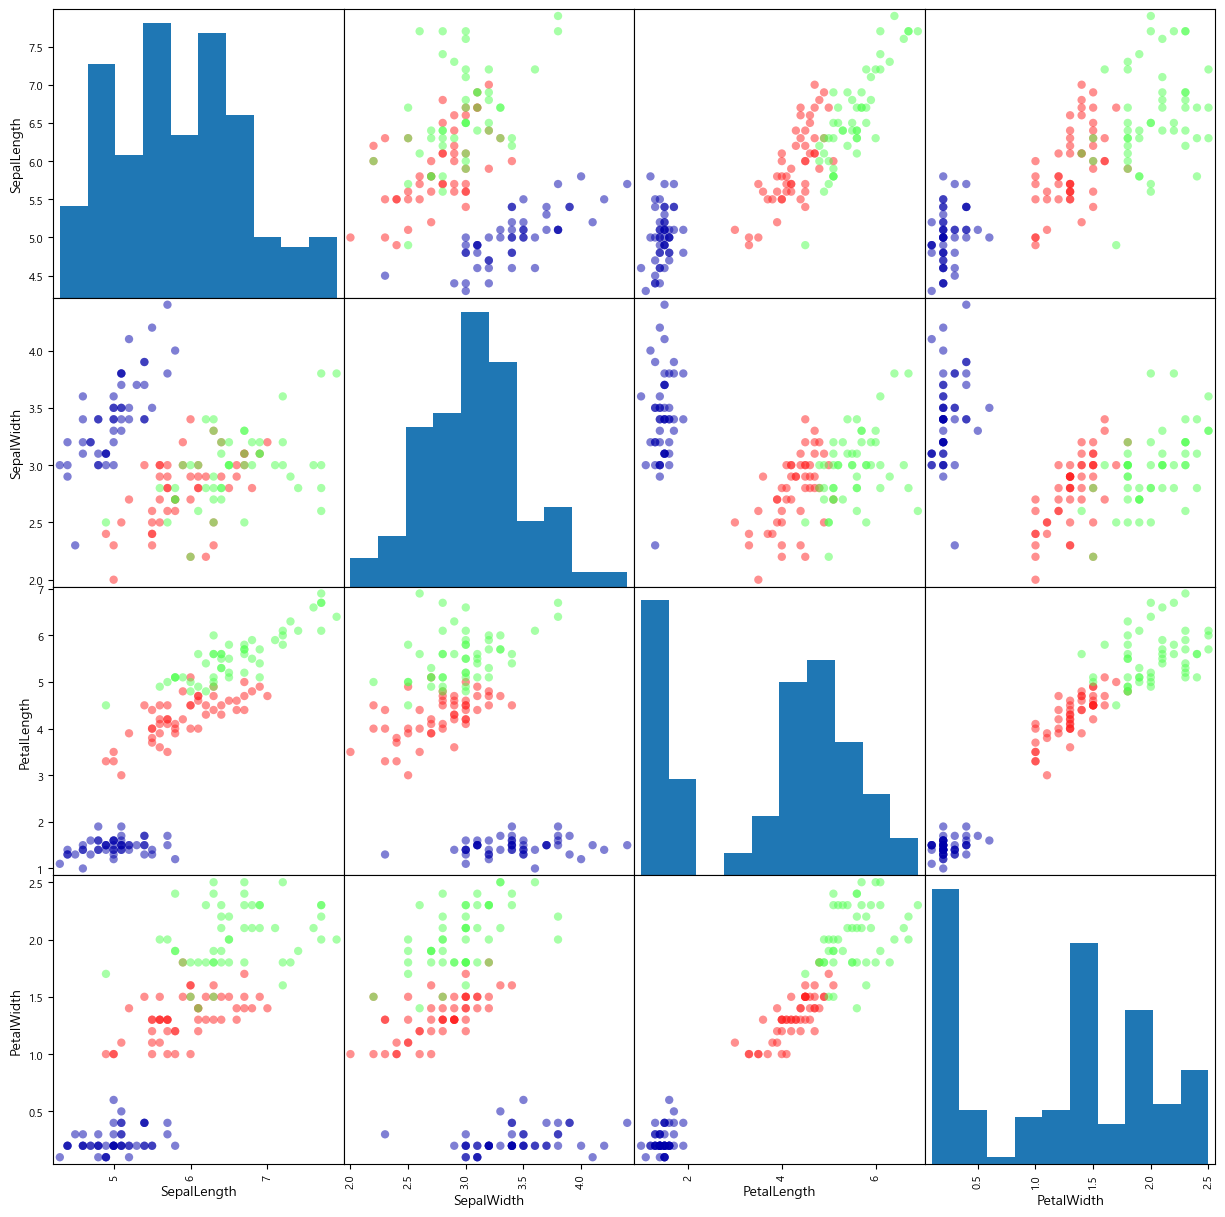

In [6]:
import mglearn
#산점도 행렬 출력
pd.plotting.scatter_matrix(X, c=y, figsize=(15,15),marker='o', cmap=mglearn.cm3)
#세 클래스가 비교적 잘 구분되고 있으므로 기계학습하기에 적합한 데이터임

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

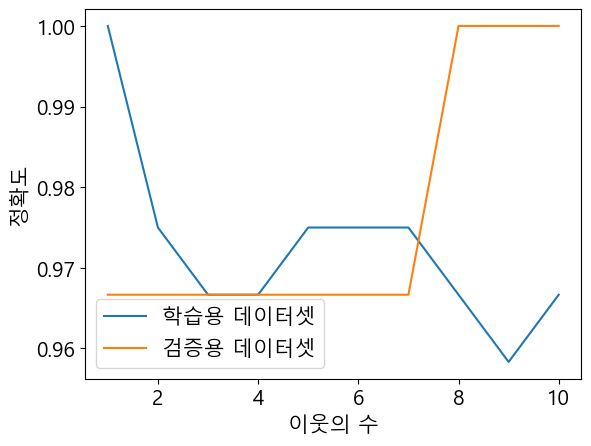

In [8]:
from sklearn.neighbors import KNeighborsClassifier
train_rate = []
test_rate = []
# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다.
# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함
# 1 에서 10 까지 n_neighbors 를 적용
neighbors = range(1, 11)
for n in neighbors:
    # 모델 생성
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    # 학습용 데이터셋의 정확도
    train_rate.append(knn.score(X_train, y_train))
    # 검증용 데이터셋의 정확도
    test_rate.append(knn.score(X_test, y_test))
plt.rcParams["font.size"]=15
plt.plot(neighbors, train_rate, label="학습용 데이터셋")
plt.plot(neighbors, test_rate, label="검증용 데이터셋")
plt.ylabel("정확도")
plt.xlabel("이웃의 수")
plt.legend()
#학습용 데이터셋의 경우 이웃이 1개일 때 100% 예측
#이웃의 수가 늘어나면 학습용 데이터셋의 경우 모델이 단순해지고 정확도는 줄어든다.
#8개를 사용했을 때 테스트 정확도가 가장 높다.

In [9]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [10]:
import numpy as np
pred=model.predict(X_test)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))
print("검증용:",np.mean(pred == y_test))

학습용: 0.9666666666666667
검증용: 1.0
검증용: 1.0


c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

In [11]:
# 예측하기 : 꽃받침의 길이가 5cm, 폭 2.9cm, 꽃잎 길이 1cm, 폭 0.2cm인 붓꽃의 품종은?
X_new = np.array([[5, 2.9, 1, 0.2]])
pred_new = model.predict(X_new)
print("예측값: {0}".format(pred_new))

예측값: [0]


c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [13]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred)
cm

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

In [14]:
df_cm=pd.DataFrame(cm, index=[0, 1, 2],
columns=[0, 1, 2])
df_cm

,0,1,2
0,10,0,0
1,0,13,0
2,0,0,7


<AxesSubplot:title={'center':'Confusion Matrix'}>

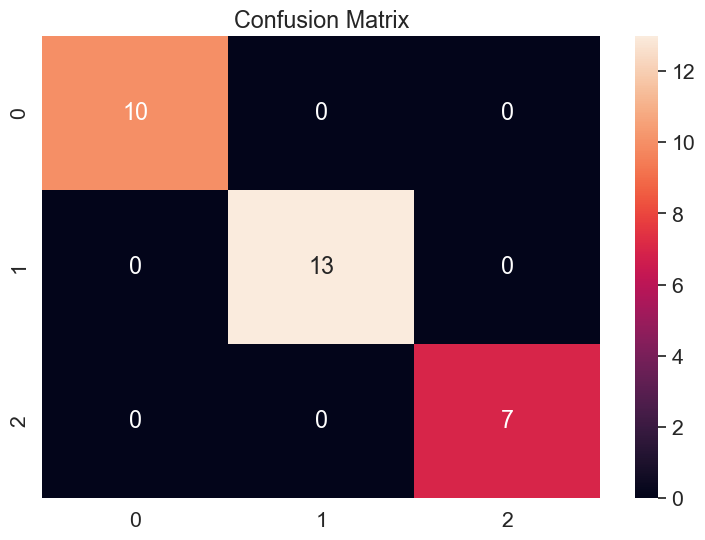

In [15]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자